### Text Mining Assignment 

#### 1st Problem Statement
Perform sentimental analysis on the Elon-musk tweets 

Dataset --> (Elon-musk.csv)

In [1]:
#Importing the Required Library
import numpy as np
import pandas as pd
import string 
import spacy
import nltk

#for Stopwords
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#For Plotting
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akaash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akaash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akaash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#loading The Dataset
tweets=pd.read_csv("C:/Users/Akaash/Downloads/Elon_musk.csv", encoding = 'Latin-1')
tweets.drop(['Unnamed: 0'],inplace = True, axis = 1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


Inference: Dropped the Unnamed Column, Now Will Do Pre-Processing

### Text Mining -- Pre-Processing

In [3]:
# remove both the leading and the trailing characters
tweets = [Text.strip() for Text in tweets.Text] 
# removes empty strings, because they are considered in Python as False
tweets = [Text for Text in tweets if Text] 
tweets[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

Inference: Removed the leading and the trailing characters and took the whole Corpus into a List

In [4]:
#Making the Dataset a Single Text(Corpus)
#Joining the list into one string/text
tweets_text = ' '.join(tweets)

Inference: The corpus is Now Converted into a Single Text For Further Processing

#### Tokenization -  1 - Tweet Tokenization

In [5]:
# Twitter Tokenizer to Remove Username
from nltk.tokenize import TweetTokenizer
TT = TweetTokenizer(strip_handles=True)
tweets_tokens = TT.tokenize(tweets_text)
print(len(tweets_tokens))

20832


Inference: Since it Was a Tweet Corpus, Used a Twitter Tokenizer To Remove Username, After the Process total Token = 20832, Again will Convert Token into a Single Text For Further Process

In [6]:
#AGAIN - Making the Dataset a Single Text(Corpus)
#AGAIN - Joining the list into one string/text
tweets_tokens_text = ' '.join(tweets_tokens)

Inference: Converted into a Single Text

#### Normalization - 1 - Removing Punctuation

In [7]:
#Punctuation
#with arguments (x, y, z) where 'x' and 'y'
no_punc_text = tweets_tokens_text.translate(str.maketrans('', '', string.punctuation))
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)

Inference: Punctuation are Removed, Now will remove url / Https

In [8]:
#Romove URL or https
import re
no_http_text = re.sub(r'http\S+', '', no_punc_text)

Inference: Now the Text has no URL in it

#### Tokenization -  2 - Word Tokenization

In [9]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_http_text)
print(len(text_tokens))

17847


Inference: Word_Token = 17847

#### Remove StopWords

In [10]:
#Removing stopwords
my_stop_words = stopwords.words('english')
sw_list = ['U0001F440','I','re','U0001F9DB','RT','\x93','\x92','U0001F923']
my_stop_words.extend(sw_list)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(len(no_stop_tokens))

11409


Inference: After Removing Stopwords, Total Tokens = 11409, Now will Normalize (LowerCase)

#### Normalization - 2 - Lowercase

In [11]:
#Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year']


Inference: Token are Now Normalizes

#### Stemming

In [12]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year']


Inference: It Can be Seen Stemming Crudly Crops the Words with no Dictionary So Wont Consider Stemming Will Go With Lemmatization

#### Lemmatization

In [13]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
# Lemmatizing the whole doc
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year']


Inference: Now Each Word/ Token has Been brought to its root (lemma) form

#### Final Processed Tweets in Text

In [14]:
# Final Processed Text
Processed_Tweets = ' '.join(lemmas)

##### Inference: Pre-Processing is Done Now Will Preform Feature Extraction

#### Feature Extraction

####  Count Vectorizer - Unigrams, Bigrams and Trigrams 

In [15]:
# Unigrams, Bigrams and Trigrams with max_features = 100
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)
#Feature Names
print(vectorizer_ngram_range.get_feature_names())

#Line Space 
print('\n')

#BOW Matrix
print(bow_matrix_ngram.toarray())

#Line Space 
print('\n')

#Matrix Size
print("Matrix Size: ",bow_matrix_ngram.toarray().shape)

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'love', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you']


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Matrix Size:  (11434, 100)


Inference: Used Count_Vectorizer To Extact Features, Used Max_Features Hyper-parameter to get only 100 Features

#### TF-IDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
# norm = l2 Unigrams, Bigrams and Trigrams with max_features = 150
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 150)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
#Getting Feature Names
print(vectorizer_n_gram_max_features.get_feature_names())

#Line Space 
print('\n')

#BOW Matrix
print(tf_idf_matrix_n_gram_max_features.toarray())

#Line Space 
print('\n')

#Matrix Size
print("Matrix Size: ",tf_idf_matrix_n_gram_max_features.toarray().shape)

['20', 'absolutely', 'actually', 'ai', 'all', 'also', 'astronaut', 'back', 'bar', 'be', 'beta', 'big', 'booster', 'build', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'early', 'earth', 'engine', 'engineering', 'even', 'ever', 'exactly', 'falcon', 'far', 'fast', 'feel', 'fire', 'first', 'flight', 'fly', 'for', 'fsd', 'future', 'game', 'get', 'giga', 'give', 'go', 'good', 'great', 'haha', 'hard', 'high', 'human', 'if', 'important', 'improvement', 'it', 'just', 'land', 'launch', 'life', 'like', 'little', 'long', 'look', 'lot', 'love', 'low', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'orbit', 'part', 'people', 'point', 'power', 'pretty', 'probably', 'problem', 'product', 'production', 'raptor', 'really', 'right', 'rocket', 'say', 'see', 'seem', 'ship', 'soon', 'sound', 'space', 'spacex', 'stage', 'starlink', 'starship', 'start', 'still', 'super', 'support', 'sure', 'take', '

Inference: Used TF-IDF Vectorizer To Extact Features, Used Max_Features Hyper-parameter to get only 150 Features

####  Generate wordcloud

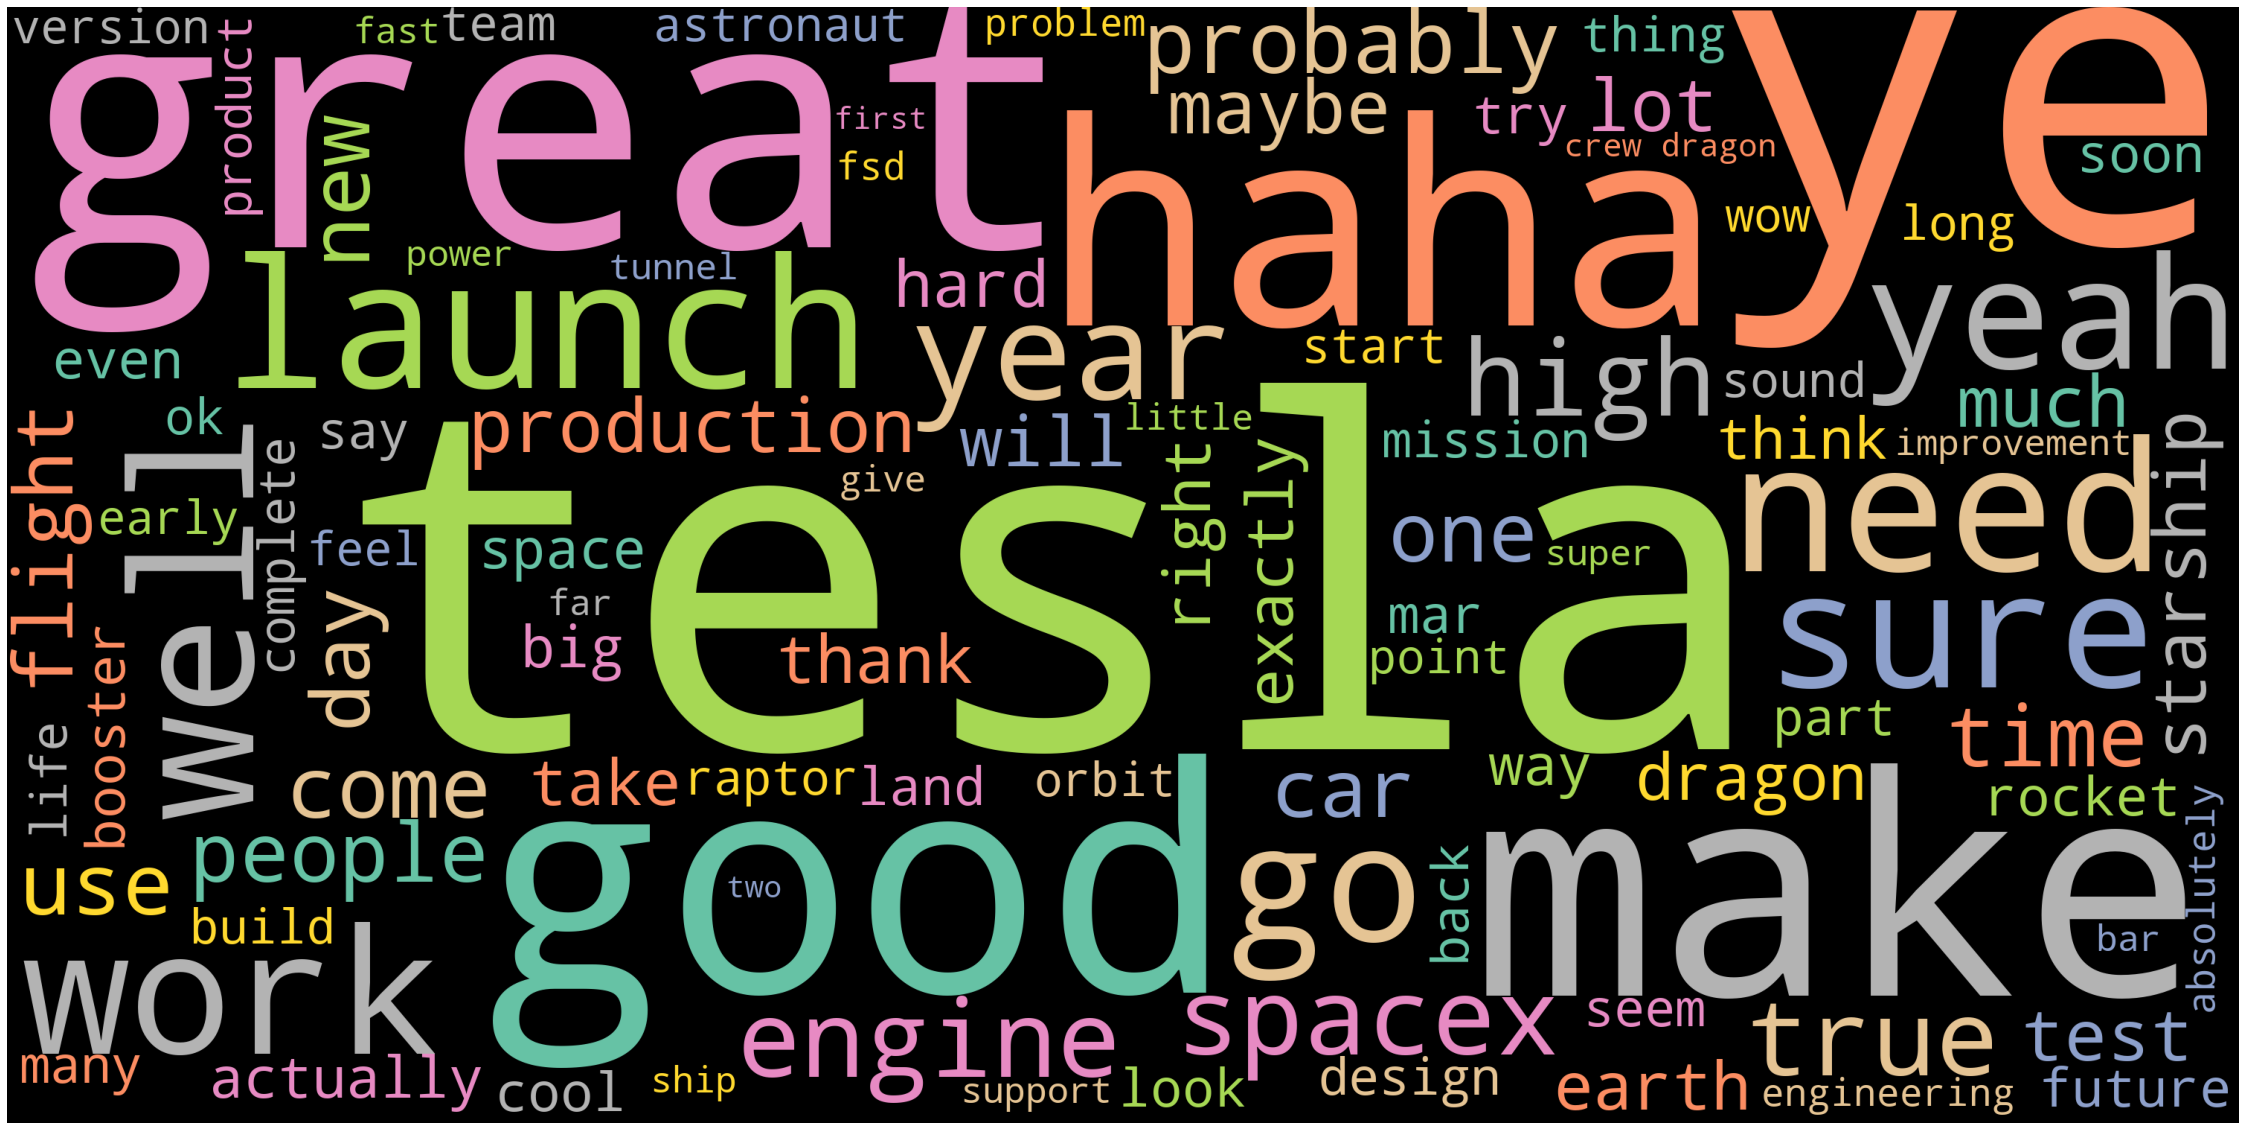

In [17]:
# Define a function to plot word cloud
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
# Generate wordcloud
stopwords = STOPWORDS
wordcloud = WordCloud(width = 3000, height = 1500, background_color='black', max_words=100,colormap='Set2',
                      stopwords=stopwords).generate(Processed_Tweets)
# Plot
plot_cloud(wordcloud)

Inference: Through This WordCloud we can visualize important Features such as Tesla, great, launch, etc

### Named Entity Recognition (NER)

#### POS Tagging

In [18]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

#Taking a Part of the Corpus and Tagging is POS
one_block = Processed_Tweets
doc_block = nlp(one_block)

#Tokenization with POS Tagged
for token in doc_block[0:20]:
    print(token, token.pos_)

alien PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge PROPN
underestimate PROPN
congratulation PROPN
tesla PROPN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV


Inference: Parts of Speech for the first 20 words

In [19]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:50])

['ray', 'trace', 'cyberpunk', 'nextlevel', 'try', 'interview', 'execution', 'year', 'year', 'ox', 'frodo', 'thought', 'fail', 'haha', 'thank', 'represent', 'time', 'allocation', 'outcome', 'send', 'agree', 'clubhouse', 'get', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'unlock', 'account', 'power', 'haha', 'wallet', 'give', 'avoid', 'cost', 'app', 'suck', 'launch', 'element', 'gateway', 'mission', 'predict']


Inference: Noun & Verbs from first 50 Words

In [20]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

#Top 10
wf_df[0:10]

,word,count
0,tesla,67
1,make,64
2,launch,61
3,year,49
4,work,49
5,need,46
6,go,43
7,come,40
8,get,39
9,haha,37


Inference: Top 10 Words/Token of Noun & Verbs

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

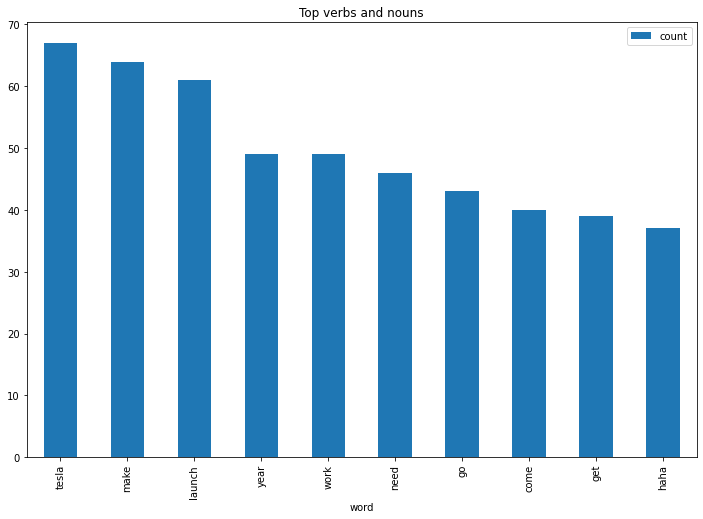

In [21]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

Inference: We Can See the Count of Each Words in the Bar Chart

### Emotion Mining / Sentiment Analysis

In [22]:
#Taking Each Tweets as one Token(Sentence)
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[0:5]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!']

In [23]:
#Creating a Dataframe of Sentences
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


Inference: We Have Total 924 Tweets

In [24]:
#Sentiment analysis - Loading Afinn Lexicon
afinn = pd.read_csv('C:/Users/Akaash/Downloads/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

Inference: Loaded the afinn Lexicon for emotion mining

In [25]:
# Taking the affinity_scores from lexicon into Dictionary
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [26]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
#Calling the function 
calculate_sentiment(text = 'good')

3

Inference: User Defined Function Words Properly

In [28]:
#Applying to the Whole DataFrame
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

# how many words are in the sentence? (Adding Wordcount column)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head()

0    13
1     4
2     4
3    13
4     8
Name: word_count, dtype: int64

#### Descriptive Stats on the affinity scores

In [29]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.345238
std        2.684749
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

Inferences : Max Score is 16, Min Score is -8

In [30]:
# Sentiment score of the review - Negative Score Filtering
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-3,40
16,Thats what youre missing.,-2,4
23,https://t.co/UEEocOfcTb The people have spoken...,-3,37
47,Would be better to have small fees than no fee...,-2,48


In [31]:
# Sentiment score of the review - Positive Score Filtering
sent_df[sent_df['sentiment_value']>0].head()

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38


In [32]:
# Sentiment score of the review - Lowest Score Filtering
sent_df[sent_df['sentiment_value']<-7].head()

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60


In [33]:
# Sentiment score of the review - Highest ScoreFiltering
sent_df[sent_df['sentiment_value']>15].head()

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [34]:
#Adding A index Column
sent_df['index']=range(0,len(sent_df))
sent_df.head()

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4


#### Visualization of Sentiment / Emotion

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

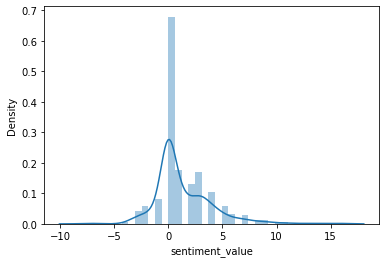

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

Inference: It is Right Skewed, thus Making the Tweets more of Positive Kind

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

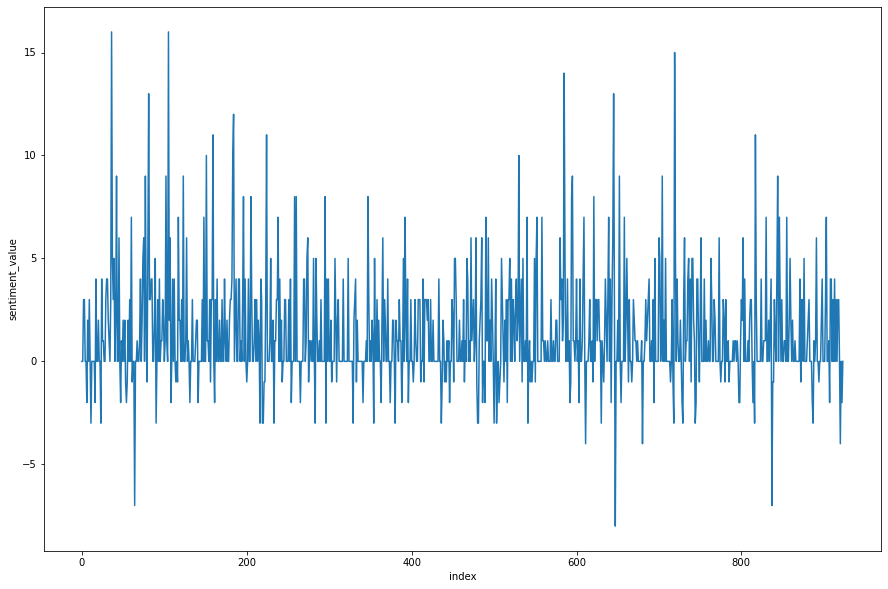

In [36]:
#Line Chart
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

Inference: Here We Can say the Tweets mostly Comes under the range of 0 to 5 which can be Called as a Neutral, with Some Positive and Negative spikes in between

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

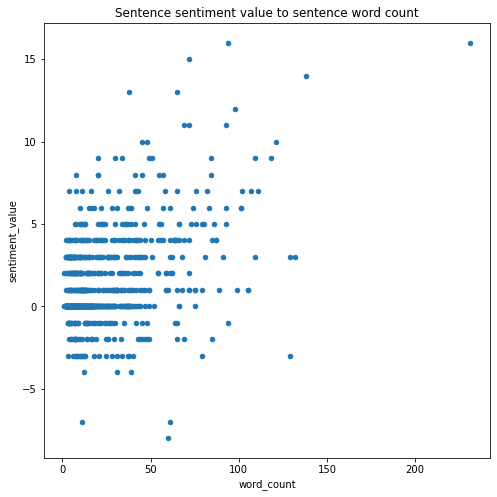

In [37]:
#Scatterplot
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')

Inference: From this Plot, it can be seen it does not really matter word count to have good sentiment_value, No Relationship betwwen Sentiment_value & word_count, And we can say this Corpus has a Neutral Polarity here